## Lab 8: $k$-medoids and $c$-means
You can use external libraries for linear algebra operations but you are expected to write your own algorithms.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 1
Use the ```s3.txt``` dataset from the previous lab.
1. Run **your** $k$-means code 20 times with $k=15$. Save the minimum, the maximum and the average values of the loss.

In [79]:
s3 = np.genfromtxt("../Datasets/s3.txt")
print(s3.shape)
print(s3)

(5000, 2)
[[453320. 606542.]
 [520651. 594591.]
 [516664. 660290.]
 ...
 [351482. 334662.]
 [341057. 341338.]
 [374464. 284441.]]


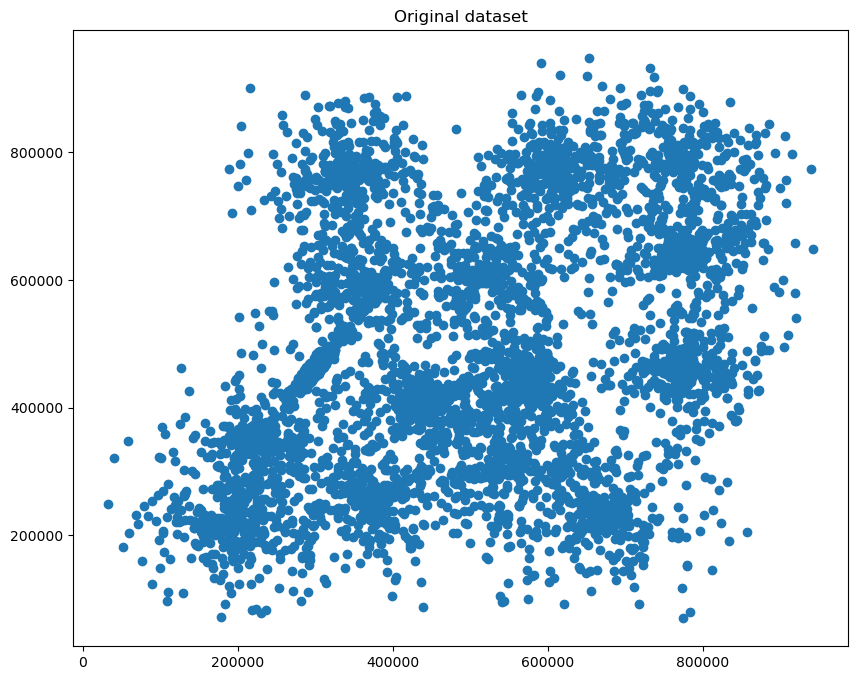

In [60]:
plt.figure(figsize=(10,8))

plt.scatter(s3[:,0], s3[:,1])
plt.title("Original dataset")
plt.show()

In [61]:
from sklearn.cluster import KMeans

In [62]:
results = np.zeros(shape=20)

for i in range(20):
    kmeans = KMeans(n_clusters=15, init='random', n_init=1)
    kmeans.fit(s3)
    results[i] = kmeans.inertia_

In [63]:
results

array([2.13767880e+13, 1.89350235e+13, 2.09529323e+13, 2.10159330e+13,
       1.93615754e+13, 1.68904487e+13, 1.92033950e+13, 2.08692468e+13,
       1.91997111e+13, 2.07326963e+13, 2.08724344e+13, 1.88929989e+13,
       2.27647845e+13, 1.87847911e+13, 1.88042454e+13, 2.30761087e+13,
       1.86833022e+13, 2.12303434e+13, 2.13784983e+13, 1.92418620e+13])

In [64]:
kmeans_avg = np.mean(results)
kmeans_min = np.min(results)
kmeans_max = np.max(results)

In [65]:
print(f"The average value of the loss is: {kmeans_avg} \nThe minimum is {kmeans_min} while the maximum is {kmeans_max}")

The average value of the loss is: 20113355946098.844 
The minimum is 16890448702878.646 while the maximum is 23076108676350.805


2. Modify your code such that it uses the $k$-means++ initialization. Perform the same experiment of point 1 and compare the obtained values.

In [66]:
results = np.zeros(shape=20)

for i in range(20):
    kmeans_pp = KMeans(n_clusters=15, init='k-means++', n_init=1)
    kmeans_pp.fit(s3)
    results[i] = kmeans_pp.inertia_

In [67]:
results

array([1.68903747e+13, 1.92322279e+13, 1.68917354e+13, 1.85798877e+13,
       1.68903043e+13, 1.68907033e+13, 1.86165035e+13, 1.86168921e+13,
       1.90137960e+13, 1.68903096e+13, 1.68904323e+13, 1.88434546e+13,
       1.91312607e+13, 1.68924004e+13, 1.90126605e+13, 1.86642404e+13,
       1.87440408e+13, 1.88731925e+13, 1.68913471e+13, 1.88055002e+13])

In [68]:
kmeans_pp_avg = np.mean(results)
kmeans_pp_min = np.min(results)
kmeans_pp_max = np.max(results)

In [69]:
print(f"The average value of the loss is: {kmeans_pp_avg} \nThe minimum is {kmeans_pp_min} while the maximum is {kmeans_pp_max}")

The average value of the loss is: 18063063195380.02 
The minimum is 16890304326642.354 while the maximum is 19232227892987.363


In [70]:
print(kmeans_avg > kmeans_pp_avg)
print(kmeans_min > kmeans_pp_min)
print(kmeans_max > kmeans_pp_max)

True
True
True


3. Build a scree plot by plotting the best (ie. the lowest) loss out of 20 runs for $k=2, \dots, 20$ (with $k$-means++). What is the optimal value of $k$?

In [71]:
loss = []

for k in range(2, 21):
    results = np.zeros(shape=20)

    for i in range(20):
        kmeans_pp = KMeans(n_clusters=k, init='k-means++', n_init=1)
        kmeans_pp.fit(s3)
        results[i] = kmeans_pp.inertia_
    
    loss.append(np.min(results))

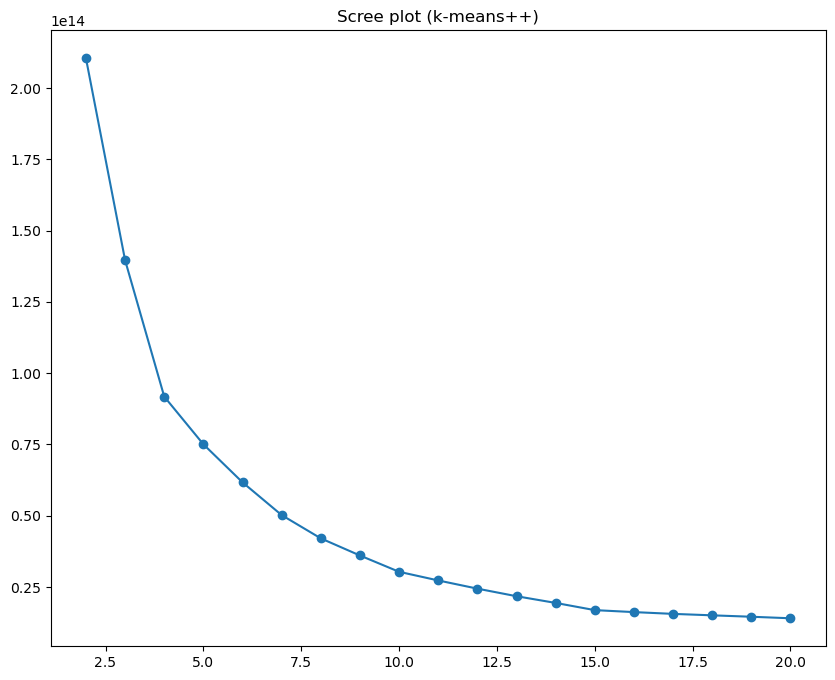

In [72]:
plt.figure(figsize=(10,8))
plt.plot(range(2,21), loss)
plt.scatter(range(2,21), loss)
plt.title("Scree plot (k-means++)")
plt.show()

4. Modify your code to perform $k$-medoids. Repeat the assignment of point 3 with the new implementation.

Note: [k-medoids documentation](https://python-kmedoids.readthedocs.io/en/latest/#)

In [73]:
from kmedoids import KMedoids #it has a sklearn-compatible API

In [74]:
loss = []

for k in range(2, 21):
    results = np.zeros(shape=20)

    for i in range(20):
        kmedoids= KMedoids(n_clusters=k, init="random", metric="euclidean")
        kmedoids.fit(s3)
        results[i] = kmedoids.inertia_
    
    loss.append(np.min(results))

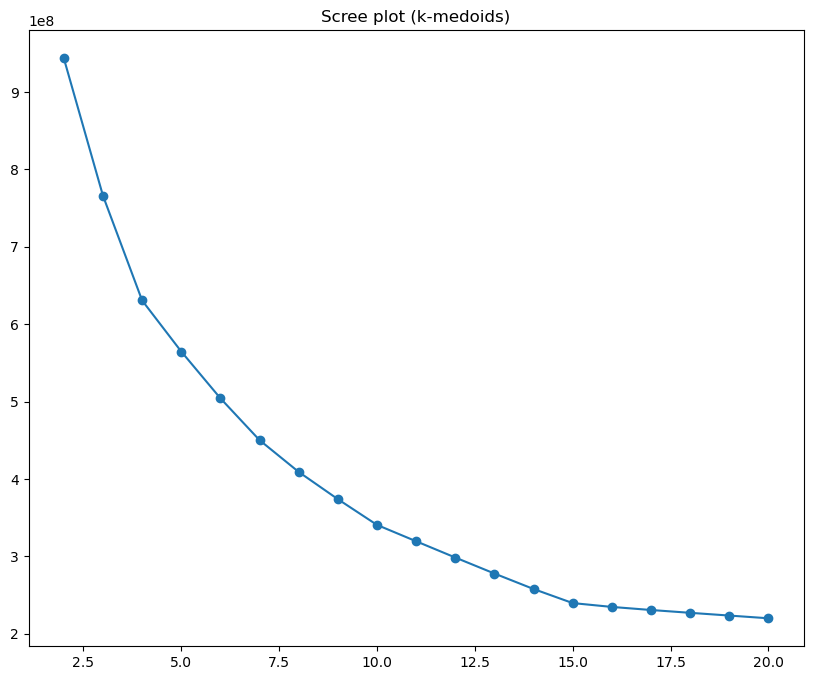

In [75]:
plt.figure(figsize=(10,8))
plt.plot(range(2,21), loss)
plt.scatter(range(2,21), loss)
plt.title("Scree plot (k-medoids)")
plt.show()

5. Modify your code to perform $c$-means. Repeat the assignment of point 3 with the new implementation.

Note: [c-means documentation](https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.cluster.html#cmeans)

In [76]:
from skfuzzy.cluster import cmeans

In [77]:
loss = []

for k in range(2, 21):
    results = np.zeros(shape=20)

    for i in range(20):
        cntr, u, u0, d, jm, p, fpc = cmeans(data= s3.T, c=k, m=2, error = 0.005, maxiter=1000, init=None)
        #NB 'data' must have shape num_features x num_points
        results[i] = jm[p-1]    # 'jm' is the history of the objective function, 'p' is the number of performed iterations
    loss.append(np.min(results))

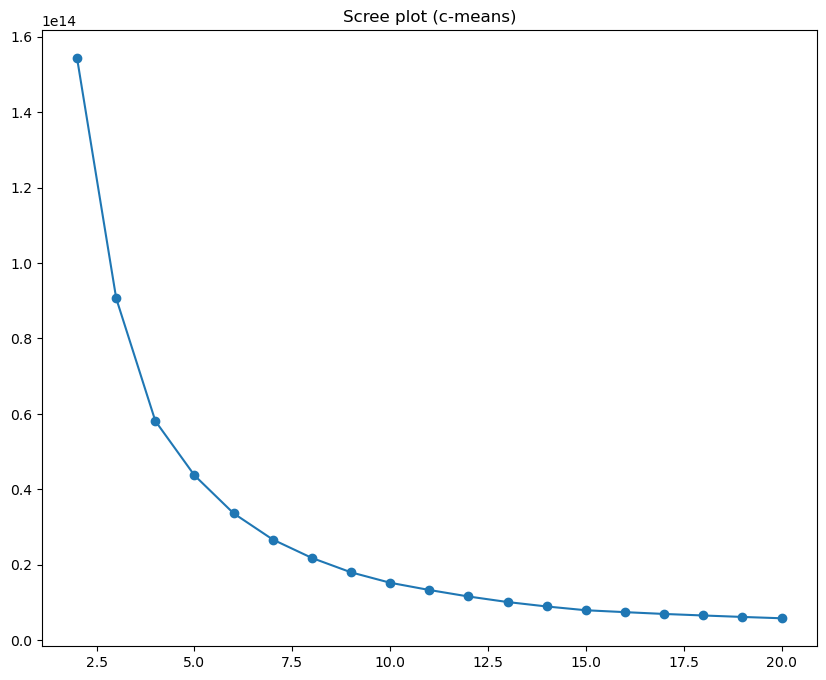

In [78]:
plt.figure(figsize=(10,8))
plt.plot(range(2,21), loss)
plt.scatter(range(2,21), loss)
plt.title("Scree plot (c-means)")
plt.show()